<a href="https://colab.research.google.com/github/OlehVorobiov/solutions_repo/blob/main/docs/Interactives/PayloadTrajectorySimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

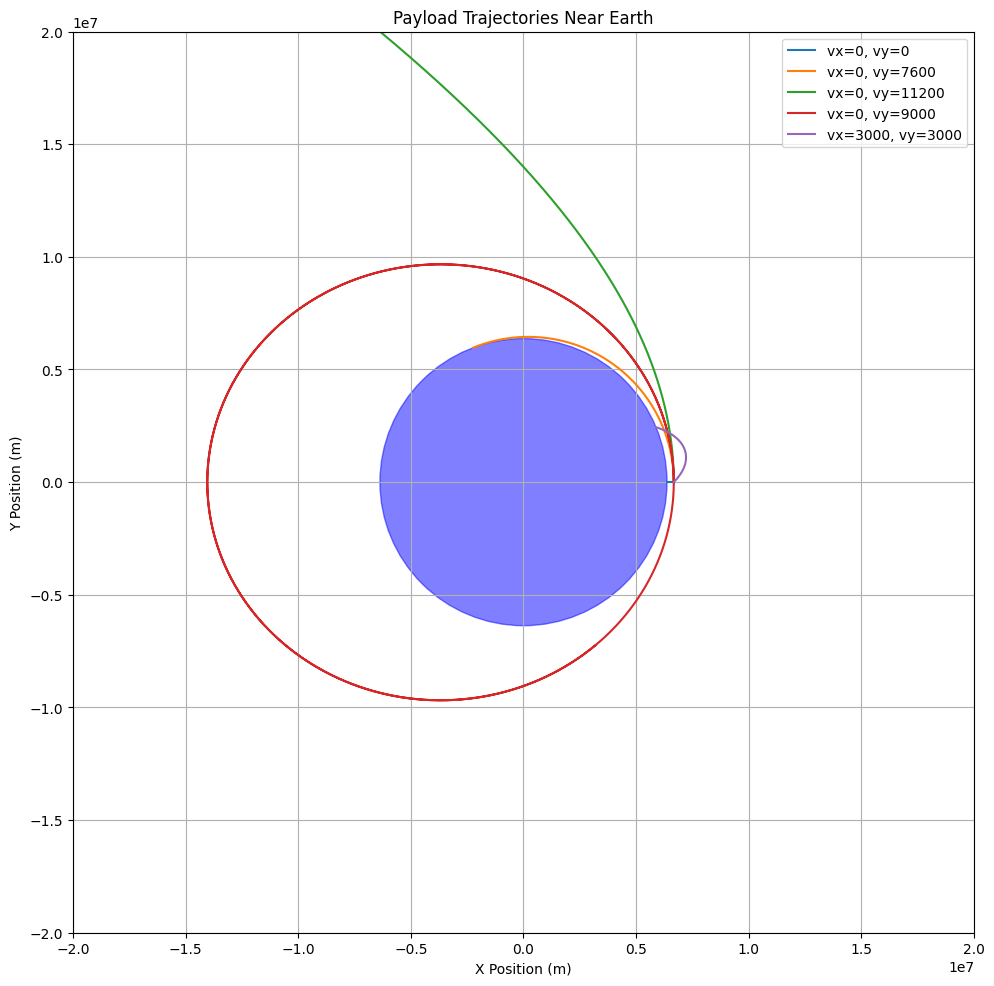

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M = 5.972e24     # Mass of Earth (kg)
R_earth = 6.371e6  # Radius of Earth (m)

# Time parameters
dt = 1            # Time step (s)
t_max = 20000     # Total time of simulation (s)
steps = int(t_max / dt)

# Initial position (altitude above Earth surface)
altitude = 300e3  # 300 km above surface
r0 = R_earth + altitude

# Define different initial velocities (magnitude and direction in x-y plane)
initial_conditions = [
    {'vx': 0, 'vy': 0},                         # Free fall
    {'vx': 0, 'vy': 7600},                      # Approx. circular orbit
    {'vx': 0, 'vy': 11200},                     # Escape velocity
    {'vx': 0, 'vy': 9000},                      # Elliptical orbit
    {'vx': 3000, 'vy': 3000},                   # Mixed trajectory
]

# Prepare for plot
fig, ax = plt.subplots(figsize=(10, 10))
earth = plt.Circle((0, 0), R_earth, color='blue', alpha=0.5)
ax.add_artist(earth)

# Run simulation for each initial condition
for ic in initial_conditions:
    # Initialize position and velocity
    x, y = r0, 0
    vx, vy = ic['vx'], ic['vy']
    trajectory_x, trajectory_y = [x], [y]

    for _ in range(steps):
        r = np.sqrt(x**2 + y**2)
        if r <= R_earth:
            break  # Payload has hit the Earth

        # Gravitational acceleration
        ax_g = -G * M * x / r**3
        ay_g = -G * M * y / r**3

        # Update velocity
        vx += ax_g * dt
        vy += ay_g * dt

        # Update position
        x += vx * dt
        y += vy * dt

        trajectory_x.append(x)
        trajectory_y.append(y)

    ax.plot(trajectory_x, trajectory_y, label=f'vx={ic["vx"]}, vy={ic["vy"]}')

# Plot setup
ax.set_title("Payload Trajectories Near Earth")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_aspect('equal', 'box')
ax.set_xlim(-2e7, 2e7)
ax.set_ylim(-2e7, 2e7)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


